<a href="https://colab.research.google.com/github/silent-developer/Fetal-Distress-Classification-based-on-Cardiotocography./blob/master/wfdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wfdb

    100% |████████████████████████████████| 102kB 5.8MB/s 
  Running setup.py bdist_wheel for wfdb ... - done
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb


In [0]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

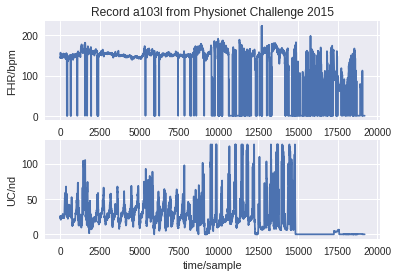

{'adc_gain': [100.0, 100.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [6289, -6136],
 'comments': ['----- Additional parameters for record 1002',
  '-- Outcome measures',
  'pH           7',
  'BDecf        7.92',
  'pCO2         12',
  'BE           -12',
  'Apgar1       8',
  'Apgar5       8',
  '-- !NotReadyYet! Neonatology outcome measures !NotReadyYet!',
  'NICU days    0',
  'Seizures     0',
  'HIE          0',
  'Intubation   0',
  'Main diag.   0',
  'Other diag.  0',
  '-- Fetus/Neonate descriptors',
  'Gest. weeks  41',
  'Weight(g)    2900',
  'Sex          2',
  '-- Maternal (risk-)factors',
  'Age          23',
  'Gravidity    1',
  'Parity       0',
  'Diabetes     0',
  'Hypertension 0',
  'Preeclampsia 0',
  'Liq. praecox 0',
  'Pyrexia      0',
  'Meconium     1',
  '-- Delivery descriptors',
  'Presentation 1',
  'Ind

In [0]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
#record = wfdb.rdrecord('sample-data/a103l') 
#wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
#display(record.__dict__)


# Can also read the same files hosted on Physiobank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = https://physionet.org/physiobank/database/challenge/2015/training/
record2 = wfdb.rdrecord('1002', pb_dir='ctu-uhb-ctgdb/')
wfdb.plot_wfdb(record=record2, title='Record a103l from Physionet Challenge 2015') 
display(record2.__dict__)


In [0]:
# this script convert the full dataset mitdb (data and annotatiosn) to text files
from google.colab import files
#from os import listdir, mkdir, system
#from os.path import isfile, isdir, join, exists

#dir = 'ediagnostic/wfdb/'#'mitdb/'
#Create folder
#dir_out = dir + 'csv/'
#if not exists(dir_out):
	#mkdir(dir_out)

#records = [f for f in listdir(dir) if isfile(join(dir, f)) if(f.find('.dat') != -1)]
#print records
record2 = wfdb.rdrecord('1002', pb_dir='ctu-uhb-ctgdb/')
for r in record2:

	command = 'rdsamp -r ' + dir + r[:-4] + ' -c -H -f 0 -v >' + dir_out + r[:-4] + '.csv'
	print(command)
	system(command)

	command_annotations = 'rdann -r ' + dir + r[:-4] +' -f 0 -a atr -v >' + dir_out + r[:-4] + '.ann'
	print(command_annotations)
	system(command_annotations)
  
  

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')


NameError: ignored

In [0]:
np.savetxt('np.csv', plo, delimiter='record2')


ValueError: ignored

In [0]:
!pip install cx_Oracle

    100% |████████████████████████████████| 675kB 6.1MB/s 


In [0]:
import cx_Oracle
import sys

con = cx_Oracle.connect("SYSTEM/20051998")
cur = con.cursor()

n = 0
while n!=4:
    try:
        print("Enter 1 for Insert into table...")
        print("Enter 2 for Delete from table...")
        print("Enter 3 to VIEW table...")
        print("Enter 4 to Exit...")

        n = int(input("Enter Your Choice = "))
        print("\n\n")
    except:
        print("Enter Valid Input...")
        n = 0
        continue

    if(n==1):
        ins = 0
        while ins!=4:
            try:                
                print("Enter 1 to insert data into DONE table...")
                print("Enter 2 to insert data into PEOPLE table...")
                print("Enter 3 to insert data into TASKS table...")
                print("Enter 4 to EXIT...")

                ins = int(input("Enter Your Choice = "))
                print("\n\n")
            except :
                print("Enter Valid Input...")
                ins = 0
                continue
            
            if(ins==1):
                weeknum = int(input("Enter week number = "))
                daynum = int(input("Enter day number = "))
                numday = int(input("Enter how many numbers are required = "))
                who = input("Enter Name of Employee = ")
                act = input("Enter Activity of Employee = ")
                cur.execute("insert into done values(:p1, :p2, :p3, :p4, :p5)", {'p1':weeknum, 'p2':daynum, 'p3':numday, 'p4':who, 'p5':act})
                print("Inserted successfully...")

            if(ins==2):
                name = input("Enter Name of Employee = ")
                skill = input("Enter Skill of Employee = ")
                color = input("Enter Color to print in Gantt Chart = ")
                cur.execute("insert into people values(:po1, :po2, :po3)", {'po1':name, 'po2':skill, 'po3':color})
                print("Inserted Successfully...")

            if(ins==3):
                ide = int(input("Enter ID of an Employee = "))
                grp = input("Enter Domain of an Employee = ")
                task = input("Enter task of an Employee = ")
                ski = input("Enter skill of Employee = ")
                effort = int(input("Enter effort of Employee = "))
                depen = input("Enter depends = ")
                cur.execute("insert into tasks values(:t1, :t2, :t3, :t4, :t5, :t6)", {'t1':ide, 't2':grp, 't3':task, 't4':ski, 't5':effort, 't6':depen})
            
            if(ins==4):
                break

    if(n==2):
        de = 0
        while de!=4:
            try:                
                print("Enter 1 to delete data from DONE table...")
                print("Enter 2 to delete data from PEOPLE table...")
                print("Enter 3 to delete data from TASKS table...")
                print("Enter 4 to EXIT...")

                de = int(input("Enter Your Choice = "))
                print("\n\n")
            except :
                print("Enter Valid Input...")
                de = 0
                continue
            
            if(de==1):
                break

            if(de==2):
                break

            if(de==3):
                break
            
            if(de==4):
                break

    if(n==3):
        up = 0
        while up!=4:
            try:                
                print("Enter 1 to print data of DONE table...")
                print("Enter 2 to print data of PEOPLE table...")
                print("Enter 3 to print data of TASKS table...")
                print("Enter 4 to Generate CSV File...")
                print("Enter 5 to EXIT...")

                up = int(input("Enter Your Choice = "))
                print("\n\n")
            except :
                print("Enter Valid Input...")
                up = 0
                continue
            
            if(up==1):
                cur.execute("select * from done")
                print(cur.fetchall())
                break

            if(up==2):
                cur.execute("select * from people")
                print(cur.fetchall())
                break

            if(up==3):
                cur.execute("select * from tasks")
                print(cur.fetchall())
                break
            
            if(up==4):
                cur.execute("select * from done")
                file = open("done.csv","w")
                file.write('week, days, numdays, who, activity\n')
                for row in cur:
                    file.write((str)(row[0]) + ',' + (str)(row[1]) + ',' +(str)(row[2])+ ',' + row[3] +','+ row[4] + '\n')
                file.close()
                
                
                cur.execute("select * from people")
                file = open("people.csv","w")
                file.write('name, skills, colour\n')
                for row in cur:
                    file.write(row[0] + ',' + row[1] + ',' + row[2] + '\n')
                file.close()
                

                cur.execute("select * from tasks")
                file = open("tasks.csv","w")
                file.write('id, group, task, skill, effort, depends\n')
                for row in cur:
                    file.write((str)(row[0]) + ',' + row[1] + ',' + row[2] + ',' + row[3] +','+ (str)(row[4])+ ','+(str)(row[5])+ '\n')
                file.close()
               
            
            if(up==5):
                break
            
    if(n==4):
        break

con.commit()
con.close()

DatabaseError: ignored

In [0]:
wfdb.wrsamp('1002',2,'bpm', record2, record2)

TypeError: ignored